In [200]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv('df.csv')

df.head()

,gen,fitness,recall,auc,layers,classif_threshold,lr,batch_size,architecture
0,0,0.941551,0.979167,0.903935,12,0.25,0.001,16,"[16.25, 0.001, 16.2, 0.1, -1.0, 32.3, 0.0, -1...."
1,0,0.863245,0.833333,0.893157,9,0.50,0.001,32,"[32.5, 0.001, 32.3, 0.1, -1.0, 32.2, 0.05, -1...."
2,0,0.871238,0.840278,0.902199,3,0.50,0.100,16,"[16.5, 0.1, 32.2, 0.05, -1.0]"
3,0,0.908673,0.930556,0.886791,18,0.25,0.100,32,"[32.25, 0.1, 32.4, 0.1, -1.0, 32.1, 0.0, -1.0,..."
4,0,0.911856,0.923611,0.900101,12,0.50,0.010,32,"[32.5, 0.01, 32.3, 0.05, -1.0, 32.4, 0.0, -1.0..."


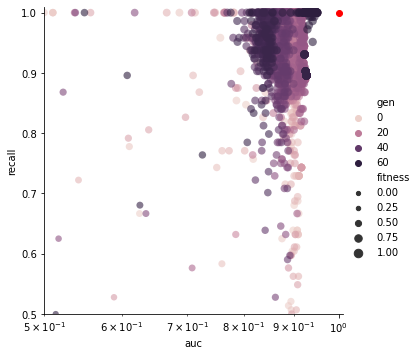

In [201]:
sns.relplot(data=df, y='recall', x='auc', hue='gen', 
            kind='scatter', size='fitness', alpha=0.6, edgecolor='none'
            )
plt.scatter(x=1, y=1, color='r')
plt.ylim(0.5, 1.01)
plt.xlim(0.5, 1.01)
plt.xscale('log')
plt.xscale('log')
plt.savefig('recall_auc.png')

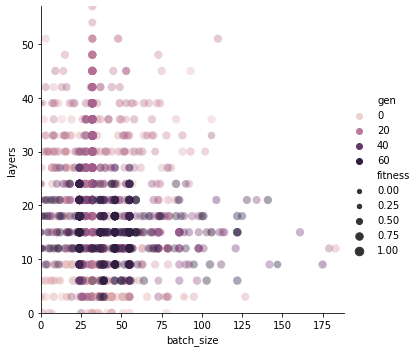

In [206]:
sns.relplot(data=df, y='layers', x='batch_size', hue='gen', 
            kind='scatter', size='fitness', alpha=0.4, edgecolor='none'
            )
plt.ylim(df['layers'].min(), df['layers'].max())
plt.xlim(df['batch_size'].min(), df['batch_size'].max() + 5)
plt.savefig('bs_layers.png')

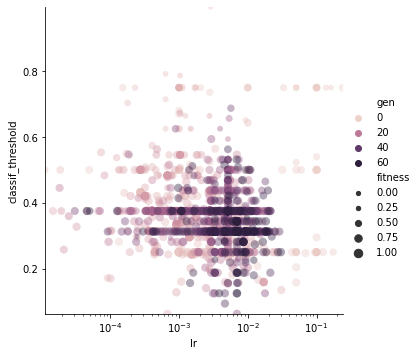

In [203]:
sns.relplot(data=df, y='classif_threshold', x='lr', hue='gen', 
            kind='scatter', size='fitness', alpha=0.4, edgecolor='none'
            )
plt.ylim(df['classif_threshold'].min(), df['classif_threshold'].max())
plt.xlim(df['lr'].min(), df['lr'].max())
plt.xscale('log')
plt.savefig('ct_lr.png')

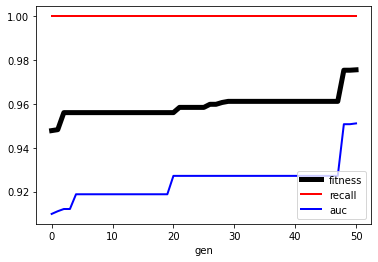

In [204]:
view = df.filter(['fitness', 'gen', 'auc', 'recall'])
view2 = pd.DataFrame(columns=view.columns)
for g in view['gen'].unique():
    d = {'gen': g}
    for c in view.columns:
        d[c] = view[view['gen'] == g][c].max()
    view2 = view2.append(d, ignore_index=True)
        
plt.plot('gen', 'fitness', data=view2, color='black', linewidth=5)
plt.plot('gen', 'recall', data=view2, color='red', linewidth=2)
plt.plot('gen', 'auc', data=view2, color='blue', linewidth=2)
plt.legend()
plt.xlabel('gen')
plt.savefig('max_metrics.png')
 

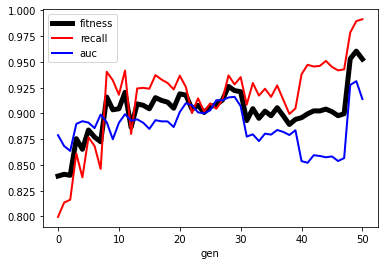

In [205]:
view = df.filter(['fitness', 'gen', 'auc', 'recall'])
view2 = pd.DataFrame(columns=view.columns)
for g in view['gen'].unique():
    d = {'gen': g}
    for c in view.columns:
        d[c] = view[view['gen'] == g][c].mean()
    view2 = view2.append(d, ignore_index=True)
        
plt.plot('gen', 'fitness', data=view2, color='black', linewidth=5)
plt.plot('gen', 'recall', data=view2, color='red', linewidth=2)
plt.plot('gen', 'auc', data=view2, color='blue', linewidth=2)
plt.legend()
plt.xlabel('gen')
plt.savefig('mean_metrics.png')